<a href="https://colab.research.google.com/github/drewwint/pub_dual-task_tom_cog-ctrl_rct/blob/main/EVC_aToM_simulation_of_concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theoretical function demonstrating mechanistic line between CU traits and Cognitive control on Affective Theory of Mind

Simulation to demonstrate concept for the project titled: *Affective theory of mind impairments linked with callous-unemotional traits implicate cognitive control: A pre-registered double-blind randomized controlled trial with a dual-task paradigm*

[Preprint](https://doi.org/10.31234/osf.io/stwj8)

By Drew E. Winters, PhD.


## Here we construct a simulation to demonstrate the relationship between
### (1) Cognitive load, CU traits, and the expected value of control (EVC)
### (2) Cognitive load, CU traits, and EVC on affective theory of mind (aToM)


## Function for (1) CU traits and the expected value of control (EVC)

First we define paremeters in the expected value of control computation
- probability of success
- cost of control

These values are used for the computation on the expected value of control

We condition this with a scaling factor - level of cognitive load - that is conditional on the level of CU traits.

This is expected to change as the control effort increases such that if there is a greater load and higher CU traits then there is a lower expected value of control.

In [ ]:
#@title Packages Loaded
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

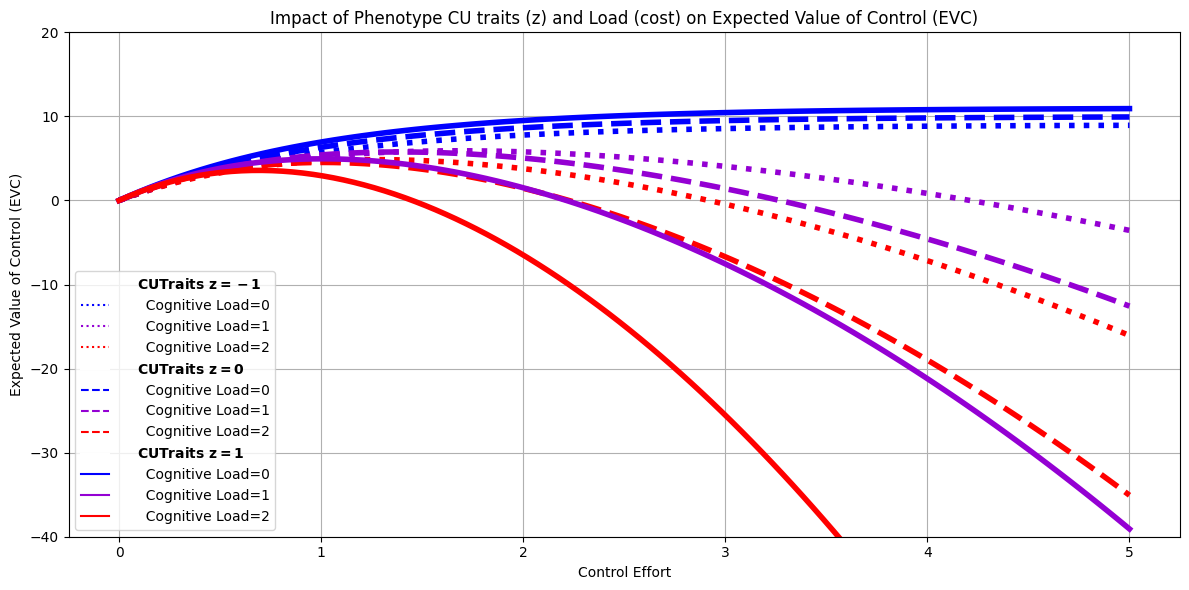

In [ ]:
#@title Function: Cognitive load, CU traits, and the expected value of control (EVC)
# Define parameters
def probability_of_success(control, z):
    """Probability of success as a function of control effort and phenotype z."""
    baseline = 1 - np.exp(-control)
    return baseline * (1 + 0.1 * z)  # Adjust success probability based on z

def cost_of_control(control, cost_factor, z):
    """Cost of control as a function of control, cost factor, and phenotype z."""
    scaling = 0.5 if z == -1 else (0.9 if z == 0 else 2)
    baseline_cost = cost_factor * control**2
    return baseline_cost * scaling  # Higher z increases cost

def expected_value_of_control(control, reward, cost_factor, z):
    """Compute the EVC given control, reward, cost factor, and phenotype z."""
    p_success = probability_of_success(control, z)
    cost = cost_of_control(control, cost_factor, z)
    return p_success * reward - cost

# Impact on outcome y
def outcome_y(control, reward, cost_factor, z):
    """Define the relationship between EVC and some outcome y."""
    evc = expected_value_of_control(control, reward, cost_factor, z)
    return evc  # Assume y is proportional to EVC; modify as needed.

# Parameters
reward = 10
cost_factors = [0, 1, 2]  # Increasing cost factors
control_values = np.linspace(0, 5, 100)  # Range of control efforts
phenotypes = [-1, 0, 1]  # Different phenotypes z (e.g., low, neutral, high impact)

line_styles = {
    -1: 'dotted',
    0: 'dashed',
    1: 'solid'
}

colors = {
    0: 'blue',
    1: 'darkviolet',
    2: 'red'
}

# Plotting
plt.figure(figsize=(12, 6))
for z in phenotypes:
    for cost_factor in cost_factors:
        y_values = [outcome_y(control, reward, cost_factor, z) for control in control_values]
        label = f'Phenotype z={z}, Cost Factor={cost_factor}'
        plt.plot(control_values,
                 y_values,
                 label=label,
                 linestyle = line_styles[z],
                 color = colors[cost_factor],
                 linewidth = 4)

# Constructing a grouped legend
legend_elements = []
for z in phenotypes:
    # Phenotype heading (bold, left-aligned, no line)
    legend_elements.append(
        Line2D(
            [0],
            [0],
            color='white',  # No line
            label=f"$\\bf{{CU Traits\\ z={z}}}$"  # Bold phenotype label
        )
    )
    # Cost factor entries under the phenotype
    for cost_factor in cost_factors:
        legend_elements.append(
            Line2D(
                [0],
                [0],
                linestyle=line_styles[z],
                color=colors[cost_factor],
                label=f'  Cognitive Load={cost_factor}'
            )
        )

# Adding the legend
plt.legend(handles=legend_elements, loc='lower left', frameon=True, handlelength=2, handletextpad=2)

# Graph details
plt.title('Impact of Phenotype CU traits (z) and Load (cost) on Expected Value of Control (EVC)')
plt.xlabel('Control Effort')
plt.ylabel('Expected Value of Control (EVC)')
plt.grid()
plt.tight_layout()
plt.ylim(-40,20)
plt.show()


In the above EVC computation We can see that
- a theoretical load value of 0 (unlikely in reality) - the level of CU traits doesnt impact a positive computation of expected value of control
- a load value of 1 - some decrease as control effort increases and this is slightly more pronounced and elevated CU traits
- a load value of 2 - substantial decreases but highly dependent on value level of CU traits such that those with average to high CU traits have a pronounced decrement in computing EVC with a rather low effort value (<2) whereas those with low CU traits start to have difficulties at a higher effort value (>3)

## Function for (2) CU traits and EVC on affective theory of mind (aToM)

Here we extend the prior function to include a simulated performance on affective theory of mind (aToM) and examine the EVC conditioned on CU traits as a moderator for aToM performance

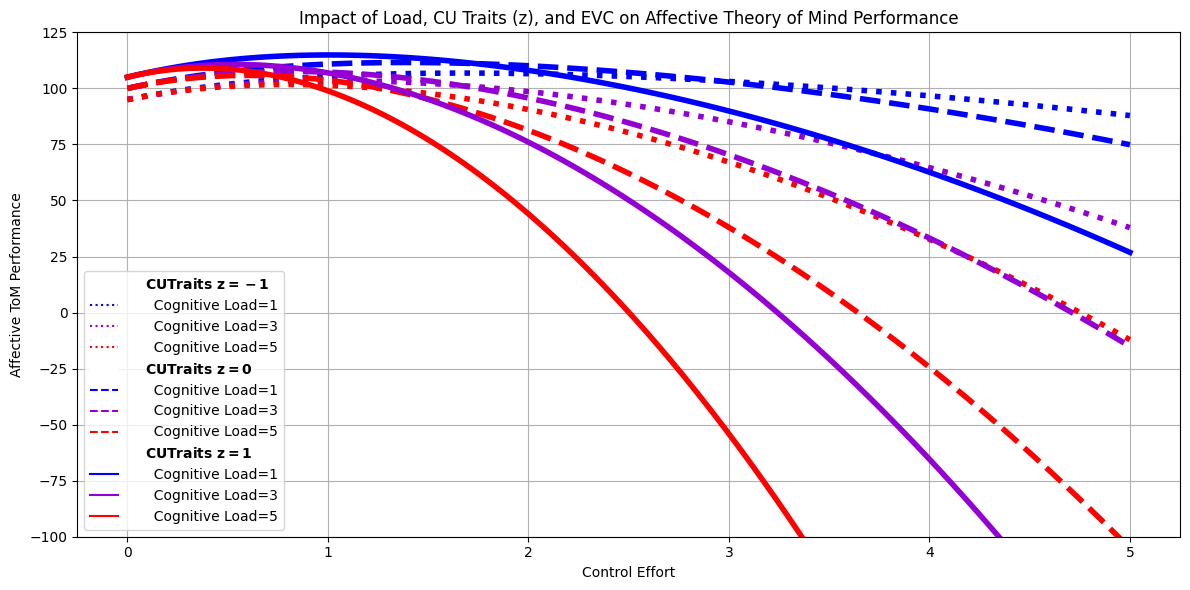

In [ ]:
#@title Function: Cognitive load, CU traits, and EVC on affective theory of mind (aToM)
# Define parameters
def probability_of_success(control, z):
    """Probability of success as a function of control effort and phenotype z."""
    baseline = 1 - np.exp(-control)
    return baseline * (1 + 0.1 * z)  # Adjust success probability based on z

def cost_of_control(control, cost_factor, z):
    """Cost of control as a function of control, cost factor, and phenotype z."""
    # Scale cost differently based on phenotype:
    # Less responsive for z = -1 and z = 0, more responsive for z = 1
    scaling = 0.5 if z == -1 else (0.9 if z == 0 else 2)
    baseline_cost = cost_factor * control**2
    return scaling * baseline_cost  # Adjust cost sensitivity based on phenotype

def expected_value_of_control(control, reward, cost_factor, z):
    """Compute the EVC given control, reward, cost factor, and phenotype z."""
    p_success = probability_of_success(control, z)
    cost = cost_of_control(control, cost_factor, z)
    return p_success * reward - cost

# Affective Theory of Mind performance as a function of EVC and phenotype
def affective_theory_of_mind_performance(evc, z):
    """
    Define AToM performance as a function of EVC and phenotype z.
    EVC moderates the relationship between z and performance.
    """
    baseline_performance = 100 + 5 * z  # Base performance increases with phenotype z
    moderation_effect = 2 * evc  # EVC enhances performance
    return baseline_performance + moderation_effect

# Parameters
reward = 10
cost_factors = [1, 3, 5]  # Cost factors with corresponding colors
control_values = np.linspace(0, 5, 100)  # Range of control efforts
phenotypes = [-1, 0, 1]  # Different phenotypes z (e.g., low, neutral, high CU traits)

# Line styles for phenotypes
line_styles = {
    -1: 'dotted',
    0: 'dashed',
    1: 'solid'
}

# Colors for cost factors
colors = {
    1: 'blue',
    3: 'darkviolet',
    5: 'red'
}

# Plotting
plt.figure(figsize=(12, 6))
for z in phenotypes:
    for cost_factor in cost_factors:
        evc_values = [
            expected_value_of_control(control, reward, cost_factor, z) for control in control_values
        ]
        atom_performance = [
            affective_theory_of_mind_performance(evc, z) for evc in evc_values
        ]
        plt.plot(
            control_values,
            atom_performance,
            linestyle=line_styles[z],
            color=colors[cost_factor],
            linewidth=4
        )

# Constructing a grouped legend
legend_elements = []
for z in phenotypes:
    # Phenotype heading (bold, left-aligned, no line)
    legend_elements.append(
        Line2D(
            [0],
            [0],
            color='white',  # No line
            label=f"$\\bf{{CU Traits\\ z={z}}}$"  # Bold phenotype label
        )
    )
    # Cost factor entries under the phenotype
    for cost_factor in cost_factors:
        legend_elements.append(
            Line2D(
                [0],
                [0],
                linestyle=line_styles[z],
                color=colors[cost_factor],
                label=f'  Cognitive Load={cost_factor}'
            )
        )

# Adding the legend
plt.legend(handles=legend_elements, loc='lower left', frameon=True, handlelength=2, handletextpad=2)

# Graph details
plt.title('Impact of Load, CU Traits (z), and EVC on Affective Theory of Mind Performance')
plt.xlabel('Control Effort')
plt.ylabel('Affective ToM Performance')
plt.grid()
plt.tight_layout()
plt.ylim(-100,125)
plt.show()


Here we can see this EVC computation varies at level of CU traits and subsequently impact aToM performance

Importantly - we can see that at lower effort there is more variation but when effort is > 1 we see substantial differences


### Conclusion

This hypothetical example demonstrates
1. The computations involved in allocating control resources and how greater cognitive demands can impact this computation
2. How theoretically these computations vary to a greater degree in those elevated in CU traits in response to cognitive demands as well as how this impacts affective theory of mind perfomrance
